<a href="https://colab.research.google.com/github/Jarin31/INTERN-PROJECT/blob/main/TREND_APP_VPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TREND APP YANG DIPASANG PADA LAYANAN VPS DALAM 5 TAHUN TERAKHIR**

# **DATA EXPLORATION**

Import relevant libraries

In [9]:
#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #RENTANG YANG SAMA

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve



## Import File

In [10]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Jarin31/INTERN-PROJECT/main/DATA%20TREND%20APP%20VPS%20-%20Gabungan%20(1).csv')
df

,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Social,Traffic,Current Live Webites by Country
0,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shop.slate.com,United States,NaN,$5000+,"20,000+",Very High,"2,656,426"
1,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vanityfair.com,United States,NaN,$5000+,"3,000,000+",Very High,"2,656,426"
2,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shareasale-analytics.com,United States,NaN,$5000+,"5,000+",-,"2,656,426"
3,Shopify,2004,2023,eCommerce,"4,708,257","7,100",appliances.sears.com,United States,NaN,$10000+,"150,000+",Very High,"2,656,426"
4,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vogue.com,United States,NaN,$10000+,"1,500,000+",Very High,"2,656,426"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Angular JS,2010,2023,Framework,"1,141,210",0,cp.pesonaedu.id,Indonesia,NaN,$250+,250+,-,"2,891"
11783,Angular JS,2010,2023,Framework,"1,141,210",0,admin-staging.fastwork.id,Indonesia,NaN,$2000+,"1,000+",-,"2,891"
11784,Angular JS,2010,2023,Framework,"1,141,210",0,adminppdb.pemalangkab.go.id,Indonesia,NaN,$1000+,"2,000+",-,"2,891"
11785,Angular JS,2010,2023,Framework,"1,141,210",0,eplanning.sulselprov.go.id,Indonesia,NaN,$500+,10+,-,"2,891"


## Evaluasi Struktur Data

In [11]:
#Menampilkan kolom dataset
df.head()

,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Social,Traffic,Current Live Webites by Country
0,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shop.slate.com,United States,NaN,$5000+,"20,000+",Very High,"2,656,426"
1,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vanityfair.com,United States,NaN,$5000+,"3,000,000+",Very High,"2,656,426"
2,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shareasale-analytics.com,United States,NaN,$5000+,"5,000+",-,"2,656,426"
3,Shopify,2004,2023,eCommerce,"4,708,257","7,100",appliances.sears.com,United States,NaN,$10000+,"150,000+",Very High,"2,656,426"
4,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vogue.com,United States,NaN,$10000+,"1,500,000+",Very High,"2,656,426"


In [12]:
#Menampilkan informasi seputar dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Web Server (APP)                      11787 non-null  object
 1   Initial Release                       11787 non-null  int64 
 2   Year of Sales Revenue                 11787 non-null  int64 
 3   Bidang                                11787 non-null  object
 4   Total Current Live Websites           11787 non-null  object
 5   Sales Revenue (Mllion) in 2023        11787 non-null  object
 6   Current Customers (Websites) in 2024  11787 non-null  object
 7   Location                              11787 non-null  object
 8   Sales Revenue Customer                4158 non-null   object
 9   Tech Spend                            11787 non-null  object
 10  Social                                7943 non-null   object
 11  Traffic                     

In [13]:
df.columns

Index(['Web Server (APP)', 'Initial Release', 'Year of Sales Revenue',
       'Bidang ', 'Total Current Live Websites',
       'Sales Revenue (Mllion) in 2023',
       'Current Customers (Websites) in 2024', 'Location',
       'Sales Revenue Customer', 'Tech Spend', 'Social', 'Traffic',
       'Current Live Webites by Country'],
      dtype='object')

In [14]:
df['Web Server (APP)'].unique()

array(['Shopify', 'Magento', 'WordPress', 'WooCommerce', 'Drupal',
       'PrestaShop', 'Nginx', 'BigCommerce', 'Sitecore CMS ', 'Hubspot',
       'OpenCart', 'AdRoll', 'New Relic', 'Apache', 'Shopify Plus',
       'nopCommerce', 'ASP.NET MVC', 'ClickFunnels', 'RevContent ',
       'Zendesk ', 'Infusionsoft', 'Google Apps for Business', 'Taboola',
       'Umbraco', 'Pardot', 'Liferay', 'Wix', 'Rackspace', 'MongoDB',
       'Amazon', 'Marketo', 'Optimizely', 'PHP', 'Adobe CQ', 'Joomla',
       'Google Analytics', 'Volusion', 'MailChimp', 'Ruby', 'Salesforce',
       'CodeIgniter', 'Criteo', 'Zoho Mail', 'Ektron', 'Squarespace',
       'Google Adsense', 'Omniture SiteCatalyst', 'Eloqua', 'Laravel',
       'ASP.NET', 'Magento 2', 'osCommerce', 'Zen Cart', 'Stripe',
       'Adobe Experience Manager', 'Oracle Commerce', 'Angular JS'],
      dtype=object)

In [15]:
df['Sales Revenue Customer'].unique()

array([nan, '$113m+', '$41m+', '$913k+', '$431k+', '$63m+', '$103m+',
       '$368k+', '$545k+', '$23m+', '$291k+', '$321k+', '$523k+',
       '$844k+', '$28m+', '$204k+', '$39m+', '$176k+', '$29k+', '$216k+',
       '$36k+', '$543k+', '$174k+', '$320k+', '$1.0m+', '$571k+',
       '$6.0m+', '$213k+', '$208k+', '$17k+', '$15k+', '$2.7m+', '$21m+',
       '$2.2m+', '$356k+', '$319k+', '$45k+', '$371k+', '$20k+', '$198k+',
       '$100m+', '$674k+', '$2.1m+', '$2.0m+', '$811k+', '$141k+',
       '$331k+', '$129k+', '$217k+', '$501k+', '$426k+', '$128k+',
       '$18k+', '$375k+', '$26k+', '$120k+', '$254k+', '$424k+', '$39k+',
       '$383k+', '$55k+', '$98k+', '$468k+', '$526k+', '$149k+', '$1k+',
       '$343k+', '$202k+', '$178k+', '$44k+', '$151k+', '$864k+', '$25k+',
       '$173k+', '$42k+', '$66k+', '$110k+', '$13k+', '$11k+', '$85k+',
       '$101k+', '$190k+', '$106k+', '$46k+', '$240k+', '$142k+',
       '$360k+', '$3.0m+', '$53k+', '$69k+', '$2.4m+', '$290k+', '$23k+',
       

In [16]:
df['Social'].unique()

array(['20,000+', '3,000,000+', '5,000+', '150,000+', '1,500,000+',
       '400,000+', '50,000+', '5,000,000+', '200,000+', '100,000+', nan,
       '1,000+', '10,000+', '50+', '2,000,000+', '750,000+', '2,000+',
       '300,000+', '0+', '100+', '500+', '500,000+', '1,000,000+', '10+',
       '250+'], dtype=object)

In [17]:
df.isna().any() #memastikan adakah yang null

Web Server (APP)                        False
Initial Release                         False
Year of Sales Revenue                   False
Bidang                                  False
Total Current Live Websites             False
Sales Revenue (Mllion) in 2023          False
Current Customers (Websites) in 2024    False
Location                                False
Sales Revenue Customer                   True
Tech Spend                              False
Social                                   True
Traffic                                  True
Current Live Webites by Country         False
dtype: bool

In [18]:
#mengisi nilai null pada kolom "Sales Revenue Customer"
df['Sales Revenue Customer'].fillna('0', inplace=True)

In [19]:
#mengisi nilai null pada kolom "Sales Revenue Customer"
df['Social'].fillna('0', inplace=True)

In [20]:
df['Current Live Webites by Country'].fillna('87443', inplace=True)
df.isna().any() #memastikan adakah yang null

Web Server (APP)                        False
Initial Release                         False
Year of Sales Revenue                   False
Bidang                                  False
Total Current Live Websites             False
Sales Revenue (Mllion) in 2023          False
Current Customers (Websites) in 2024    False
Location                                False
Sales Revenue Customer                  False
Tech Spend                              False
Social                                  False
Traffic                                  True
Current Live Webites by Country         False
dtype: bool

In [21]:
df['Traffic'].unique()

array(['Very High', '-', 'High', 'Medium', nan], dtype=object)

In [22]:
df['Traffic'].fillna('-', inplace=True)

In [23]:
df.isna().any()

Web Server (APP)                        False
Initial Release                         False
Year of Sales Revenue                   False
Bidang                                  False
Total Current Live Websites             False
Sales Revenue (Mllion) in 2023          False
Current Customers (Websites) in 2024    False
Location                                False
Sales Revenue Customer                  False
Tech Spend                              False
Social                                  False
Traffic                                 False
Current Live Webites by Country         False
dtype: bool

In [24]:
df['Current Live Webites by Country'].unique()

array(['2,656,426', '207,349', '150,839', '123,054', '121,795', '7,394',
       '42,298', '10,106', '8,876', '8,080', '4,336', '277', '3,682,121',
       '1,716,273', '1,335,511', '965,267', '940,731', '209,630',
       '2,413,274', '245,949', '169,828', '169,240', '156,591', '21,082',
       '159,919', '31,387', '27,386', '23,591', '18,805', '891', '48,440',
       '38,392', '25,210', '17,828', '17,821', '333', '3,126,020',
       '2,810,387', '2,715,725', '1,860,145', '1,678,518', '87,355',
       '31,837', '2,709', '2,702', '1,293', '926', '46', '4,836', '848',
       '600', '421', '415', '25', '268,861', '36,277', '26,896', '20,384',
       '16,842', '800', '64,971', '55,395', '18,532', '10,041', '9,842',
       '647', '87,443', '5,216', '3,763', '3,275', '1,310', '87',
       '825,888', '99,867', '39,679', '22,064', '20,356', '1,251',
       '5,318,052', '3,464,722', '1,961,999', '1,417,945', '1,324,802',
       '102,862', '27,039', '3,430', '3,095', '2,926', '1,383', '39',
      

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Web Server (APP)                      11787 non-null  object
 1   Initial Release                       11787 non-null  int64 
 2   Year of Sales Revenue                 11787 non-null  int64 
 3   Bidang                                11787 non-null  object
 4   Total Current Live Websites           11787 non-null  object
 5   Sales Revenue (Mllion) in 2023        11787 non-null  object
 6   Current Customers (Websites) in 2024  11787 non-null  object
 7   Location                              11787 non-null  object
 8   Sales Revenue Customer                11787 non-null  object
 9   Tech Spend                            11787 non-null  object
 10  Social                                11787 non-null  object
 11  Traffic                     

## **DATA CLEANING**

In [26]:
df_tmp = df

In [27]:
df_tmp

,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Social,Traffic,Current Live Webites by Country
0,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shop.slate.com,United States,0,$5000+,"20,000+",Very High,"2,656,426"
1,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vanityfair.com,United States,0,$5000+,"3,000,000+",Very High,"2,656,426"
2,Shopify,2004,2023,eCommerce,"4,708,257","7,100",shareasale-analytics.com,United States,0,$5000+,"5,000+",-,"2,656,426"
3,Shopify,2004,2023,eCommerce,"4,708,257","7,100",appliances.sears.com,United States,0,$10000+,"150,000+",Very High,"2,656,426"
4,Shopify,2004,2023,eCommerce,"4,708,257","7,100",vogue.com,United States,0,$10000+,"1,500,000+",Very High,"2,656,426"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Angular JS,2010,2023,Framework,"1,141,210",0,cp.pesonaedu.id,Indonesia,0,$250+,250+,-,"2,891"
11783,Angular JS,2010,2023,Framework,"1,141,210",0,admin-staging.fastwork.id,Indonesia,0,$2000+,"1,000+",-,"2,891"
11784,Angular JS,2010,2023,Framework,"1,141,210",0,adminppdb.pemalangkab.go.id,Indonesia,0,$1000+,"2,000+",-,"2,891"
11785,Angular JS,2010,2023,Framework,"1,141,210",0,eplanning.sulselprov.go.id,Indonesia,0,$500+,10+,-,"2,891"


In [28]:
# Menentukan jenis layanan untuk setiap aplikasi
vps_apps = {
    "Apache", "Nginx", "PHP", "Ruby", "ASP.NET", "ASP.NET MVC", "Angular Js", "CodeIgniter", "Laravel",
    "Wordpress", "Joomla", "Drupal", "Magento", "Magento 2", "PrestaShop", "OpenCart", "osCommerce",
    "WooCommerce", "Zen Cart", "nop Commerce", "Sitecore CMS", "Umbraco", "Adobe Experience Manager", "BigCommerce", "Shopify", "Shopify Plus", "Squarespace", "Wix", "Volusion",  "MongoDB", "Rackspace", "Amazon AWS EC2"
}

# Menambahkan kolom 'jenis layanan' berdasarkan kategori
df_tmp['jenis layanan'] = df_tmp['Web Server (APP)'].apply(lambda x: 'VPS' if x in vps_apps else 'SaaS')

# Menampilkan DataFrame
print(df_tmp)

      Web Server (APP)  Initial Release  Year of Sales Revenue    Bidang   \
0              Shopify             2004                   2023  eCommerce   
1              Shopify             2004                   2023  eCommerce   
2              Shopify             2004                   2023  eCommerce   
3              Shopify             2004                   2023  eCommerce   
4              Shopify             2004                   2023  eCommerce   
...                ...              ...                    ...        ...   
11782       Angular JS             2010                   2023  Framework   
11783       Angular JS             2010                   2023  Framework   
11784       Angular JS             2010                   2023  Framework   
11785       Angular JS             2010                   2023  Framework   
11786       Angular JS             2010                   2023  Framework   

      Total Current Live Websites Sales Revenue (Mllion) in 2023  \
0      

**Analisis Kolom Tech Spend**

In [29]:
df_tmp['Tech Spend'].unique()

array(['$5000+', '$10000+', '$2000+', '$1000+', '$500+', '$250+', '$100+',
       '$50+', '$10+', '$0+'], dtype=object)

In [30]:
# ubah ke tipe string untuk menghilangkan huruf "$" dan "+"
df_tmp['Tech Spend'] = df_tmp['Tech Spend'].str.replace('$','')
df_tmp['Tech Spend'] = df_tmp['Tech Spend'].str.replace('+','')
df_tmp['Tech Spend'] = df_tmp['Tech Spend'].astype(int)

In [31]:
df_tmp['Tech Spend']

0         5000
1         5000
2         5000
3        10000
4        10000
         ...  
11782      250
11783     2000
11784     1000
11785      500
11786     1000
Name: Tech Spend, Length: 11787, dtype: int64

**Analisis Kolom Social**

In [32]:
df_tmp['Social'].unique()

array(['20,000+', '3,000,000+', '5,000+', '150,000+', '1,500,000+',
       '400,000+', '50,000+', '5,000,000+', '200,000+', '100,000+', '0',
       '1,000+', '10,000+', '50+', '2,000,000+', '750,000+', '2,000+',
       '300,000+', '0+', '100+', '500+', '500,000+', '1,000,000+', '10+',
       '250+'], dtype=object)

In [33]:
df_tmp['Social'] = df_tmp['Social'].str.replace('+','')
df_tmp['Social'] = df_tmp['Social'].str.replace(',','')
df_tmp['Social'] = df_tmp['Social'].astype(int)
df_tmp['Social'].unique()

array([  20000, 3000000,    5000,  150000, 1500000,  400000,   50000,
       5000000,  200000,  100000,       0,    1000,   10000,      50,
       2000000,  750000,    2000,  300000,     100,     500,  500000,
       1000000,      10,     250])

**Analisis Kolom initial Release**

In [34]:
df_tmp['Initial Release'].astype(int)

0        2004
1        2004
2        2004
3        2004
4        2004
         ... 
11782    2010
11783    2010
11784    2010
11785    2010
11786    2010
Name: Initial Release, Length: 11787, dtype: int64

**Analisis Kolom Total Current Live Websites**

In [35]:
df_tmp['Total Current Live Websites'].unique()

array(['4,708,257', '129,106', '33,578,516', '5,917,453', '457,053',
       '227,514', '52,830,295', '42,703', '10,609', '551,692', '271,635',
       '116,591', '1,303,160', '52,468,484', '48,644', '10,536',
       '610,251', '215,901', '16,246', '636,985', '24,691', '15,026,065',
       '92,477', '5,410', '48,236', '13,518', '8,145,583', '413,399',
       '4,158', '73,896,211', '35,070', '208,069', '29,256,046', '13,966',
       '1,000,564', '32,740,315', '5,678', '1,241,097', '744,494',
       '102,955', '454,056', '354,966', '1,223,171', '428', '4,368,281',
       '44,394,693', '201,098', '10,205', '976,933', '5,343,158',
       '86,985', '46,082', '47,661', '1,491,287', '37,714', '6,825',
       '1,141,210'], dtype=object)

In [36]:
df_tmp['Total Current Live Websites'] = df_tmp['Total Current Live Websites'].str.replace(',','')
df_tmp['Total Current Live Websites'] = df_tmp['Total Current Live Websites'].astype(int)

**Analisis Kolom Sales Revenue (Mllion) in 2023**

In [37]:
df_tmp['Sales Revenue (Mllion) in 2023'].unique()

array(['7,100', '47.4', '635,500', '20,000', '47.9', '84.1', '30',
       '309.4', '410.9', '2,170', '3.9', '375.0', '960', '8,300', '7,060',
       '9,350', '0', '160', '10,6', '2,140', '22', '16,000', '1,440',
       '10,7', '18,7', '29,3', '1,562', '2,950', '1,284', '574,790',
       '210', '400', '83', '19', '307', '49', '700', '70', '31,352',
       '1,950', '8,703', '1,010', '237,860', '5,200', '12,500', '23.30',
       '2,500', '15', '14,000', '4,890', '35,300'], dtype=object)

In [38]:
df_tmp['Sales Revenue (Mllion) in 2023'] = df_tmp['Sales Revenue (Mllion) in 2023'].str.replace(',','')
df_tmp['Sales Revenue (Mllion) in 2023'] = df_tmp['Sales Revenue (Mllion) in 2023'].astype(float)

**Analisis Kolom Current Live Webites by Country**

In [39]:
df_tmp['Current Live Webites by Country'].unique()

array(['2,656,426', '207,349', '150,839', '123,054', '121,795', '7,394',
       '42,298', '10,106', '8,876', '8,080', '4,336', '277', '3,682,121',
       '1,716,273', '1,335,511', '965,267', '940,731', '209,630',
       '2,413,274', '245,949', '169,828', '169,240', '156,591', '21,082',
       '159,919', '31,387', '27,386', '23,591', '18,805', '891', '48,440',
       '38,392', '25,210', '17,828', '17,821', '333', '3,126,020',
       '2,810,387', '2,715,725', '1,860,145', '1,678,518', '87,355',
       '31,837', '2,709', '2,702', '1,293', '926', '46', '4,836', '848',
       '600', '421', '415', '25', '268,861', '36,277', '26,896', '20,384',
       '16,842', '800', '64,971', '55,395', '18,532', '10,041', '9,842',
       '647', '87,443', '5,216', '3,763', '3,275', '1,310', '87',
       '825,888', '99,867', '39,679', '22,064', '20,356', '1,251',
       '5,318,052', '3,464,722', '1,961,999', '1,417,945', '1,324,802',
       '102,862', '27,039', '3,430', '3,095', '2,926', '1,383', '39',
      

In [40]:
df_tmp['Current Live Webites by Country'] = df_tmp['Current Live Webites by Country'].str.replace(',','')
df_tmp['Current Live Webites by Country'] = df_tmp['Current Live Webites by Country'].astype(int)

**Analisis Kolom Sales Revenue Customer**

In [41]:
df_tmp['Sales Revenue Customer'].unique()

array(['0', '$113m+', '$41m+', '$913k+', '$431k+', '$63m+', '$103m+',
       '$368k+', '$545k+', '$23m+', '$291k+', '$321k+', '$523k+',
       '$844k+', '$28m+', '$204k+', '$39m+', '$176k+', '$29k+', '$216k+',
       '$36k+', '$543k+', '$174k+', '$320k+', '$1.0m+', '$571k+',
       '$6.0m+', '$213k+', '$208k+', '$17k+', '$15k+', '$2.7m+', '$21m+',
       '$2.2m+', '$356k+', '$319k+', '$45k+', '$371k+', '$20k+', '$198k+',
       '$100m+', '$674k+', '$2.1m+', '$2.0m+', '$811k+', '$141k+',
       '$331k+', '$129k+', '$217k+', '$501k+', '$426k+', '$128k+',
       '$18k+', '$375k+', '$26k+', '$120k+', '$254k+', '$424k+', '$39k+',
       '$383k+', '$55k+', '$98k+', '$468k+', '$526k+', '$149k+', '$1k+',
       '$343k+', '$202k+', '$178k+', '$44k+', '$151k+', '$864k+', '$25k+',
       '$173k+', '$42k+', '$66k+', '$110k+', '$13k+', '$11k+', '$85k+',
       '$101k+', '$190k+', '$106k+', '$46k+', '$240k+', '$142k+',
       '$360k+', '$3.0m+', '$53k+', '$69k+', '$2.4m+', '$290k+', '$23k+',
       

In [42]:
df['Sales Revenue Customer'] = df['Sales Revenue Customer'].str.replace('$','')
df['Sales Revenue Customer'] = df['Sales Revenue Customer'].str.replace('+','')
df['Sales Revenue Customer'] = df['Sales Revenue Customer'].str.replace(',','')

In [43]:
def convert_values(array):
    def convert(value):
        if 'k' in value:
            return value.replace('k', '000')
        elif 'm' in value:
            if '.' in value:
                return value.replace('.', '').replace('m', '00000')
            return value.replace('m', '000000')
        elif 'b' in value:
            return value.replace('b', '000000000')
        return value

    return np.array([convert(value) for value in array])

In [44]:
df['Sales Revenue Customer'] = convert_values(df['Sales Revenue Customer'])

In [45]:
df['Sales Revenue Customer'] = df['Sales Revenue Customer'].astype(int)

In [46]:
df['Sales Revenue Customer'].unique()

array([          0,   113000000,    41000000,      913000,      431000,
          63000000,   103000000,      368000,      545000,    23000000,
            291000,      321000,      523000,      844000,    28000000,
            204000,    39000000,      176000,       29000,      216000,
             36000,      543000,      174000,      320000,     1000000,
            571000,     6000000,      213000,      208000,       17000,
             15000,     2700000,    21000000,     2200000,      356000,
            319000,       45000,      371000,       20000,      198000,
         100000000,      674000,     2100000,     2000000,      811000,
            141000,      331000,      129000,      217000,      501000,
            426000,      128000,       18000,      375000,       26000,
            120000,      254000,      424000,       39000,      383000,
             55000,       98000,      468000,      526000,      149000,
              1000,      343000,      202000,      178000,      

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Web Server (APP)                      11787 non-null  object 
 1   Initial Release                       11787 non-null  int64  
 2   Year of Sales Revenue                 11787 non-null  int64  
 3   Bidang                                11787 non-null  object 
 4   Total Current Live Websites           11787 non-null  int64  
 5   Sales Revenue (Mllion) in 2023        11787 non-null  float64
 6   Current Customers (Websites) in 2024  11787 non-null  object 
 7   Location                              11787 non-null  object 
 8   Sales Revenue Customer                11787 non-null  int64  
 9   Tech Spend                            11787 non-null  int64  
 10  Social                                11787 non-null  int64  
 11  Traffic        

In [48]:
# Rename the column
df.rename(columns={'Social': 'Instagram Followers'}, inplace=True)

In [49]:
df['Bidang '] = df['Bidang '].str.replace('CRM','Analytics and Tracking')
df['Bidang '] = df['Bidang '].str.replace('A/B testing and personalization.','Analytics and Tracking')
df['Bidang '] = df['Bidang '].str.replace('Frameworks','Framework')

In [50]:
a = df[df['Bidang '] == 'Framework']
a


,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Instagram Followers,Traffic,Current Live Webites by Country,jenis layanan
3677,ASP.NET MVC,2007,2023,Framework,610251,0.0,pc.gunbroker.com,United States,0,2000,5000,High,346549,VPS
3678,ASP.NET MVC,2007,2023,Framework,610251,0.0,propertysales.geico.com,United States,0,10000,20000,Very High,346549,VPS
3679,ASP.NET MVC,2007,2023,Framework,610251,0.0,careers.petsmart.com,United States,0,5000,150000,High,346549,VPS
3680,ASP.NET MVC,2007,2023,Framework,610251,0.0,gettyimages.com,United States,0,5000,750000,Very High,346549,VPS
3681,ASP.NET MVC,2007,2023,Framework,610251,0.0,xbox.com,United States,3000000,10000,20000,Very High,346549,VPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Angular JS,2010,2023,Framework,1141210,0.0,cp.pesonaedu.id,Indonesia,0,250,250,-,2891,SaaS
11783,Angular JS,2010,2023,Framework,1141210,0.0,admin-staging.fastwork.id,Indonesia,0,2000,1000,-,2891,SaaS
11784,Angular JS,2010,2023,Framework,1141210,0.0,adminppdb.pemalangkab.go.id,Indonesia,0,1000,2000,-,2891,SaaS
11785,Angular JS,2010,2023,Framework,1141210,0.0,eplanning.sulselprov.go.id,Indonesia,0,500,10,-,2891,SaaS


In [51]:
# Temukan nilai unik dalam kolom tertentu (misalnya, 'Kota') setelah difilter
unique_values = a['Web Server (APP)'].unique()

print("Nilai unik dalam kolom 'Kota' setelah difilter:")
print(unique_values)

Nilai unik dalam kolom 'Kota' setelah difilter:
['ASP.NET MVC' 'PHP' 'Ruby' 'CodeIgniter' 'Laravel' 'ASP.NET' 'Angular JS']


In [52]:
df['Current Live Webites by Country'].unique()

array([2656426,  207349,  150839,  123054,  121795,    7394,   42298,
         10106,    8876,    8080,    4336,     277, 3682121, 1716273,
       1335511,  965267,  940731,  209630, 2413274,  245949,  169828,
        169240,  156591,   21082,  159919,   31387,   27386,   23591,
         18805,     891,   48440,   38392,   25210,   17828,   17821,
           333, 3126020, 2810387, 2715725, 1860145, 1678518,   87355,
         31837,    2709,    2702,    1293,     926,      46,    4836,
           848,     600,     421,     415,      25,  268861,   36277,
         26896,   20384,   16842,     800,   64971,   55395,   18532,
         10041,    9842,     647,   87443,    5216,    3763,    3275,
          1310,      87,  825888,   99867,   39679,   22064,   20356,
          1251, 5318052, 3464722, 1961999, 1417945, 1324802,  102862,
         27039,    3430,    3095,    2926,    1383,      39,    3985,
           694,     693,     454,     254,       2,  346549,   46380,
         24244,   19

In [53]:
count_1597146 = df['Current Live Webites by Country'].value_counts().get(1597146, 0)
count_1597146

80

In [54]:
# Mengubah nilai kolom 'Current Live Websites by Country'
df['Current Live Websites by Country'] = df.loc[(df['Location'] == 'United Kingdom') & (df['Web Server (APP)'] == 'Google Analytics'), 'Current Live Websites by Country'] = 1597146

In [55]:
# Memverifikasi apakah perubahan sudah benar
if df.loc[(df['Location'] == 'United Kingdom') & (df['Web Server (APP)'] == 'Google Analytics'), 'Current Live Websites by Country'].values[0] == 1597146:
    print("\nPerubahan berhasil.")
else:
    print("\nPerubahan tidak berhasil.")


Perubahan berhasil.


In [56]:
count_15971461 = df['Current Live Webites by Country'].value_counts().get(1597146, 0)
count_15971461

80

In [57]:
df['Bidang '].unique()

array(['eCommerce', 'Content Management System', 'Web Servers',
       'Analytics and Tracking', 'Advertising', 'Framework',
       'advertising', 'Email Hosting Providers', 'Web Hosting Providers',
       'Data Center', 'Open Source', 'Application Performance',
       'Marketing', 'Payment'], dtype=object)

## **FEATURE ENGINEERING**

In [58]:
df['Usia Perusahaan'] = 2024 - df['Initial Release']
df

,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Instagram Followers,Traffic,Current Live Webites by Country,jenis layanan,Current Live Websites by Country,Usia Perusahaan
0,Shopify,2004,2023,eCommerce,4708257,7100.0,shop.slate.com,United States,0,5000,20000,Very High,2656426,VPS,1597146,20
1,Shopify,2004,2023,eCommerce,4708257,7100.0,vanityfair.com,United States,0,5000,3000000,Very High,2656426,VPS,1597146,20
2,Shopify,2004,2023,eCommerce,4708257,7100.0,shareasale-analytics.com,United States,0,5000,5000,-,2656426,VPS,1597146,20
3,Shopify,2004,2023,eCommerce,4708257,7100.0,appliances.sears.com,United States,0,10000,150000,Very High,2656426,VPS,1597146,20
4,Shopify,2004,2023,eCommerce,4708257,7100.0,vogue.com,United States,0,10000,1500000,Very High,2656426,VPS,1597146,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Angular JS,2010,2023,Framework,1141210,0.0,cp.pesonaedu.id,Indonesia,0,250,250,-,2891,SaaS,1597146,14
11783,Angular JS,2010,2023,Framework,1141210,0.0,admin-staging.fastwork.id,Indonesia,0,2000,1000,-,2891,SaaS,1597146,14
11784,Angular JS,2010,2023,Framework,1141210,0.0,adminppdb.pemalangkab.go.id,Indonesia,0,1000,2000,-,2891,SaaS,1597146,14
11785,Angular JS,2010,2023,Framework,1141210,0.0,eplanning.sulselprov.go.id,Indonesia,0,500,10,-,2891,SaaS,1597146,14


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11787 entries, 0 to 11786
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Web Server (APP)                      11787 non-null  object 
 1   Initial Release                       11787 non-null  int64  
 2   Year of Sales Revenue                 11787 non-null  int64  
 3   Bidang                                11787 non-null  object 
 4   Total Current Live Websites           11787 non-null  int64  
 5   Sales Revenue (Mllion) in 2023        11787 non-null  float64
 6   Current Customers (Websites) in 2024  11787 non-null  object 
 7   Location                              11787 non-null  object 
 8   Sales Revenue Customer                11787 non-null  int64  
 9   Tech Spend                            11787 non-null  int64  
 10  Instagram Followers                   11787 non-null  int64  
 11  Traffic        

In [60]:
df.describe()

,Initial Release,Year of Sales Revenue,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Sales Revenue Customer,Tech Spend,Instagram Followers,Current Live Webites by Country,Current Live Websites by Country,Usia Perusahaan
count,11787.000000,11787.000000,1.178700e+04,11787.000000,1.178700e+04,11787.000000,1.178700e+04,1.178700e+04,11787.0,11787.000000
mean,2004.180114,2023.016883,7.671022e+06,33069.285357,5.806981e+07,3346.993298,1.350971e+05,3.255325e+05,1597146.0,19.819886
std,6.161445,0.128839,1.668636e+07,122767.377663,1.045146e+09,3454.013718,5.198703e+05,7.905555e+05,0.0,6.161445
min,1982.000000,2023.000000,4.280000e+02,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+00,1597146.0,10.000000
25%,2000.000000,2023.000000,4.766100e+04,47.900000,0.000000e+00,500.000000,0.000000e+00,1.971000e+03,1597146.0,16.000000
50%,2006.000000,2023.000000,4.133990e+05,410.900000,0.000000e+00,2000.000000,1.000000e+03,1.948300e+04,1597146.0,18.000000
75%,2008.000000,2023.000000,4.368281e+06,7060.000000,7.500000e+04,5000.000000,2.000000e+04,1.599190e+05,1597146.0,24.000000
max,2014.000000,2024.000000,7.389621e+07,635500.000000,5.000000e+10,10000.000000,5.000000e+06,5.318052e+06,1597146.0,42.000000


In [61]:
df

,Web Server (APP),Initial Release,Year of Sales Revenue,Bidang,Total Current Live Websites,Sales Revenue (Mllion) in 2023,Current Customers (Websites) in 2024,Location,Sales Revenue Customer,Tech Spend,Instagram Followers,Traffic,Current Live Webites by Country,jenis layanan,Current Live Websites by Country,Usia Perusahaan
0,Shopify,2004,2023,eCommerce,4708257,7100.0,shop.slate.com,United States,0,5000,20000,Very High,2656426,VPS,1597146,20
1,Shopify,2004,2023,eCommerce,4708257,7100.0,vanityfair.com,United States,0,5000,3000000,Very High,2656426,VPS,1597146,20
2,Shopify,2004,2023,eCommerce,4708257,7100.0,shareasale-analytics.com,United States,0,5000,5000,-,2656426,VPS,1597146,20
3,Shopify,2004,2023,eCommerce,4708257,7100.0,appliances.sears.com,United States,0,10000,150000,Very High,2656426,VPS,1597146,20
4,Shopify,2004,2023,eCommerce,4708257,7100.0,vogue.com,United States,0,10000,1500000,Very High,2656426,VPS,1597146,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Angular JS,2010,2023,Framework,1141210,0.0,cp.pesonaedu.id,Indonesia,0,250,250,-,2891,SaaS,1597146,14
11783,Angular JS,2010,2023,Framework,1141210,0.0,admin-staging.fastwork.id,Indonesia,0,2000,1000,-,2891,SaaS,1597146,14
11784,Angular JS,2010,2023,Framework,1141210,0.0,adminppdb.pemalangkab.go.id,Indonesia,0,1000,2000,-,2891,SaaS,1597146,14
11785,Angular JS,2010,2023,Framework,1141210,0.0,eplanning.sulselprov.go.id,Indonesia,0,500,10,-,2891,SaaS,1597146,14


In [62]:
df.columns

Index(['Web Server (APP)', 'Initial Release', 'Year of Sales Revenue',
       'Bidang ', 'Total Current Live Websites',
       'Sales Revenue (Mllion) in 2023',
       'Current Customers (Websites) in 2024', 'Location',
       'Sales Revenue Customer', 'Tech Spend', 'Instagram Followers',
       'Traffic', 'Current Live Webites by Country', 'jenis layanan',
       'Current Live Websites by Country', 'Usia Perusahaan'],
      dtype='object')

In [63]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Remove non-numeric columns
dfnum = df.drop(columns=non_numeric_columns)

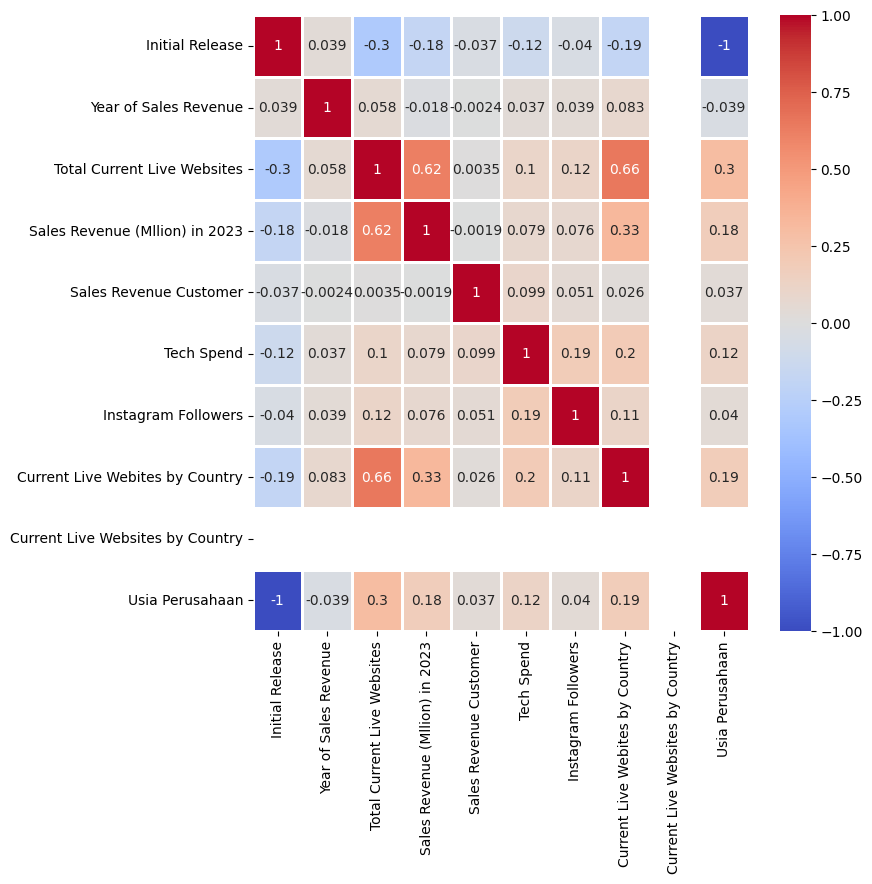

In [64]:
plt.figure(figsize=(8,8))
ax = sn.heatmap(dfnum.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [65]:
#download Dataframe menjadi CSV untuk membuat dashboard di looker studio
df.to_csv('Data Trend App Layanan VPS.csv', index=False)

from google.colab import files
files.download('Data Trend App Layanan VPS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>